# Capstone Project: Used Car Prices

Yingjie Ouyang's final capstone project, which focuses on developing a model that predicts the price of used cars.

Adapted from MIT and Great Learning

### **Context:**

 Cars are an essential part of every day life, serving as the most common form of transportation, especially when public transportation is unavailable or unreliable and places are too far to reach by foot. Many households own at least one car, and it isn't an uncommon sight to see highways congested with cars all trying to reach their destination. In the car market, used cars make up a significant portion, with many preferring to buy second-handed due to their more affordable prices.
 
 The price of used cars often depends on many features, such as model, the year it was manufactured, and how much it has already been driven before being sold. A model that predicts the price of used cars is useful to buyers in the market for a car, but do not wish to exceed their budget over a brand new car. The model would aid buyers in finding the appropriate car that suits their needs as well as being within budget, as well as allowing them to get more use out of a previously-owned car as opposed to sending it to be scrapped.

### **The objective:**

 Based on the features given, construct a model that predicts the price of used cars. The model should take into account the most important aspects of a used car that contributes to its price. In addition, the model will be optimized using machine learning algorithms to ensure that it performs to the best of its ability.

### **The key questions:**

Some key questions include:
- What are the most important features that affect the price of used cars?
- How do we understand the relationship between features and how does that affect how we build the model?
- What steps need to be taken to build the model?
- How can the model be trained and optimized using machine learning algorithms?

### **The problem formulation**:

By identifying the most important features that affect used car prices, we can build a linear regression model to predict the data we do not have.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

Adapted from MIT

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("used_cars.csv")

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**
- There are 7252 entries in the data
- S.No. of each row matches its index value, so it can most likely be dropped
- New_price and Price can have null values

In [5]:
# Check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**
- All entries are filled with non-null values except Mileage, Engine, Power, Seats, New_price, and Price
- Mileage only has two null values, which could simply just be missing data. Same could possibly apply to Engine, Power, and Seats
- New_price has many missing values; almost all of the data under that attribute is missing. This makes sense as we are dealing with used cars whose price for when they were first released may no longer be available.

The `S.No.` column has no null values. In addition, the number of unique values equal to the number of observations. Thus, it can be dropped as it provides no useful information for our predictions

In [7]:
data.drop('S.No.', axis = 1, inplace = True)

## **Exploratory Data Analysis**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:**
- The Year seems to be consistently within 1996-2019, with the average manufacturing year of cars in the dataset being ~2013.
- Kilometers_Driven has a wide range, with minimum being 171 and the max being 6,500,000. However, the mean and median are rather close together, indicating the data is mostly evenly distributed. The max value could potentially be an outlier, however.
- Mileage has a lower range, with a min of 0 and max of about 34. However, it seems to be evenly distributed as mean and median both fall around 18.1
- Average number of Seats is around 5, although there exists cars in the dataset with 2 and 10 seats.
- New_price and Price's data seem to be widely spread, but this may be due to the low number of data, especially for New_price.

In [9]:
# Explore basic summary statistics of categorical variables
data.describe(include = ['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


#### **Observations and Insights:**
- There are 2041 different brand and models of cars, with the most common being the Mahindra XUV500 W8 2WD at 55 cars.
- There are 5 fuel types, the most common being Diesel which makes up over half the data.
- There are only two types of transmissions, with the majority of cars being Manual.
- Most cars have only had one owner, though there exist cars that have been owned by more than four people.

**Thoughts:**
- The column for kilometers_driven seems to have some extreme values. That could warrant further investigation.
- Mileage has a minimum value of zero, which is questionable.

In [11]:
# Check Kilometers_Driven extreme values
data.sort_values('Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**
- The car with the most km driven is a BMW X5 xDrive 30d M Sport. However, it seems to have been manufactured fairly recently, in 2017.
- The km driven for the car is listed as 6500000 km, which is impossible for a car manufactured so recently.
- It could potentially be an erroneous entry, and is a massive outlier if we leave it in. Thus, we will drop it

In [12]:
data.drop(2328, inplace = True)

In [13]:
# Check Mileage extreme values
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
In this section, we will look at each variable in the data set independently. We will explore the spread of values, such as their range and measures of central tendency.

### **1. Numerical Data**

In [14]:
# function that displays boxplot and histogram for input feature of as an array

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

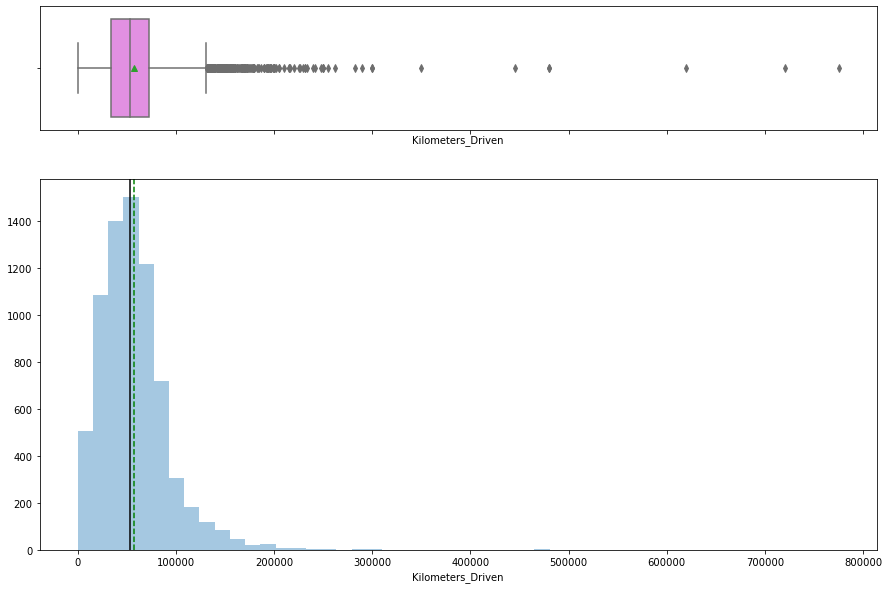

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Observation:** Kilometers_Driven appears to be right-skewed. To reduce skewness, we perform a log transformation

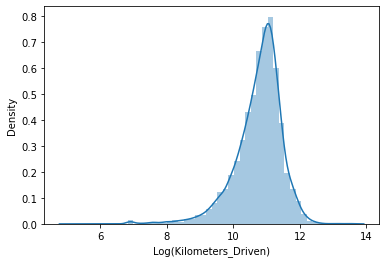

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations:**
- Log of Kilometers_Driven seems more normally-distributed, with a peak of around 11. However, it has become a little more left-skewed.
- It is still preferred over Kilometers_Driven, as being heavily skewed can affect the prediction model due to its outliers.
- The model should be trained on data that follows the Gaussian Distribution as closely as possible.

In [17]:
# Add the reuslting log transformation as a feature in the data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

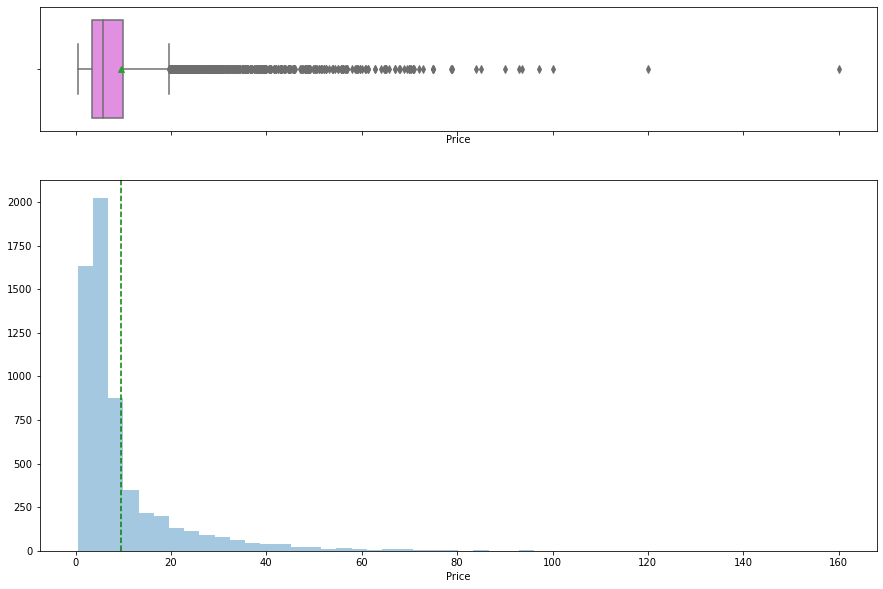

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data["Price"])

Since Price is also skewed, we will do the same with the column as we did with Kilometers_Driven

<AxesSubplot:xlabel='Log(Price)', ylabel='Density'>

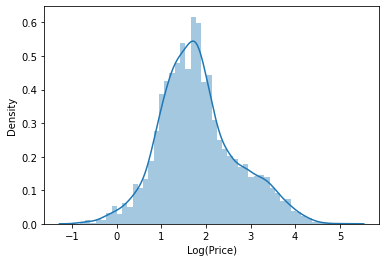

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)")

In [20]:
data["price_log"] = np.log(data["Price"])

We will now look at the rest of the numerical features

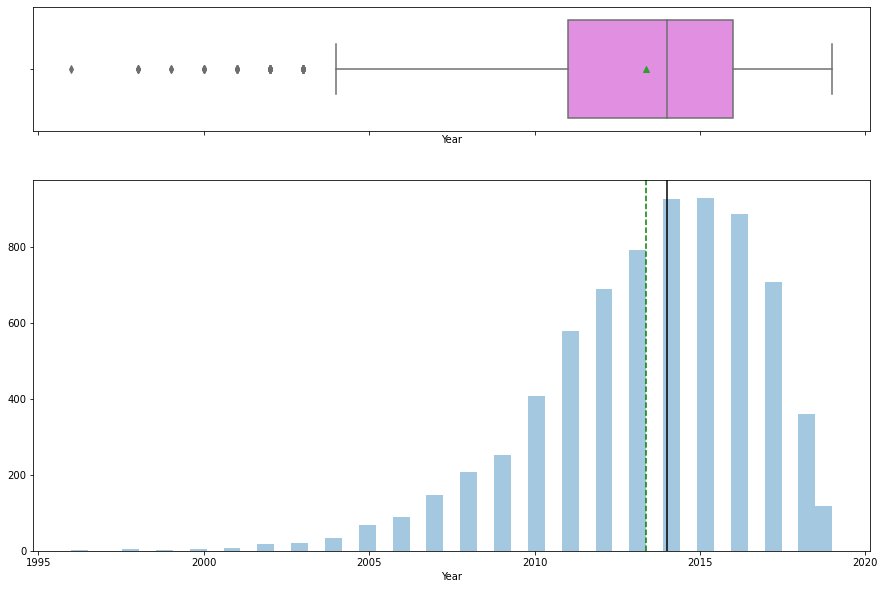

In [21]:
histogram_boxplot(data["Year"])

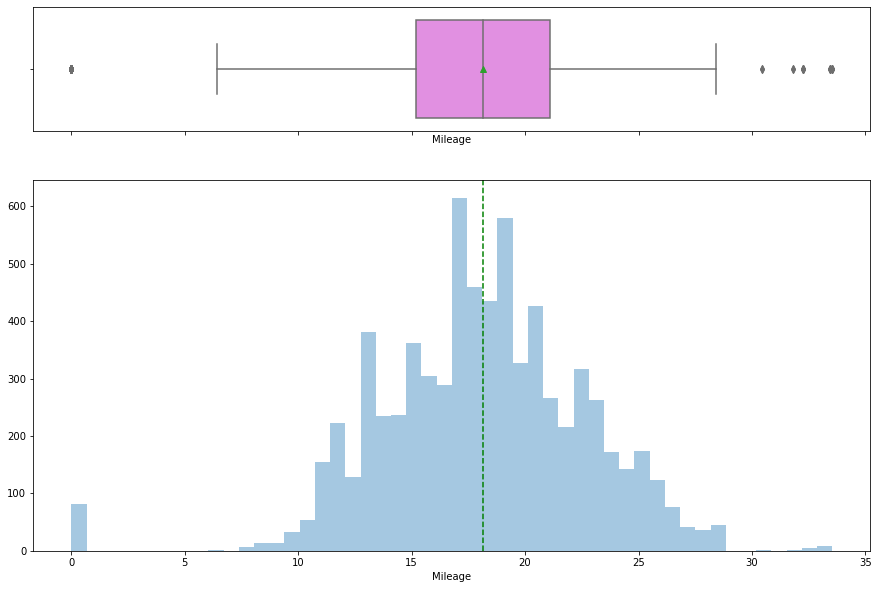

In [22]:
histogram_boxplot(data["Mileage"])

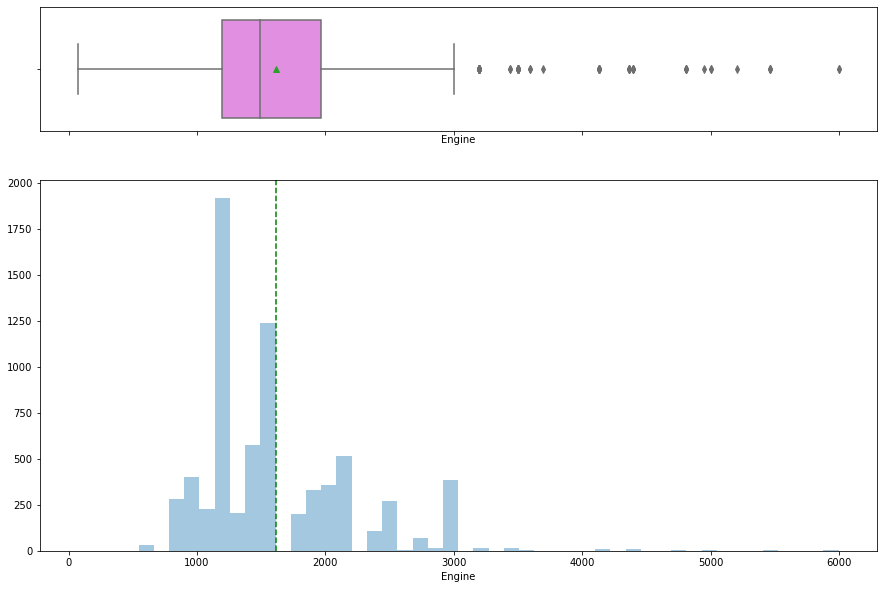

In [23]:
histogram_boxplot(data["Engine"])

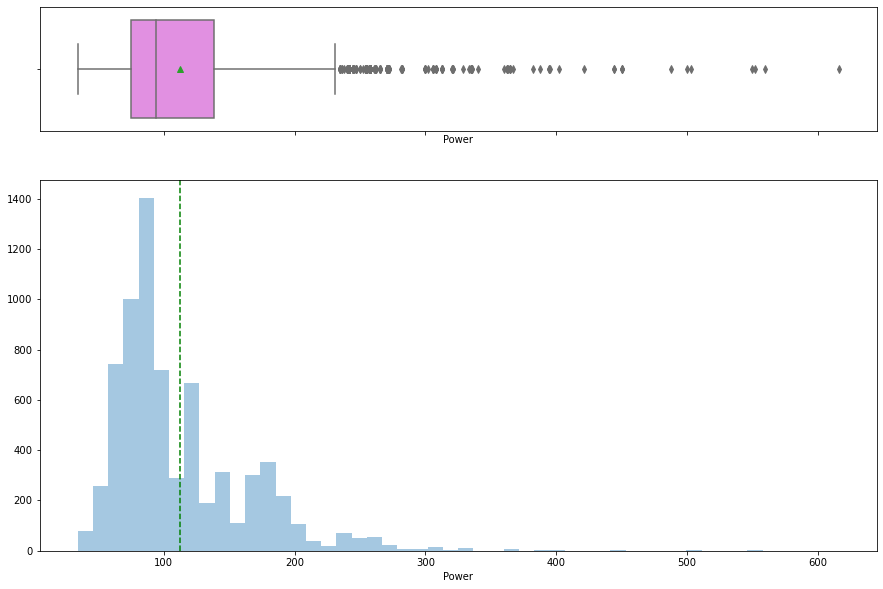

In [24]:
histogram_boxplot(data["Power"])

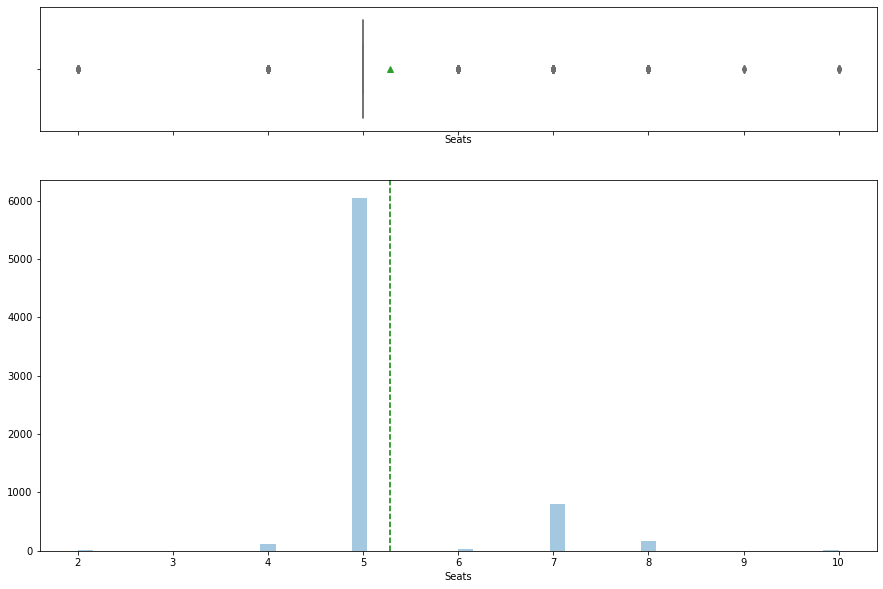

In [25]:
histogram_boxplot(data["Seats"])

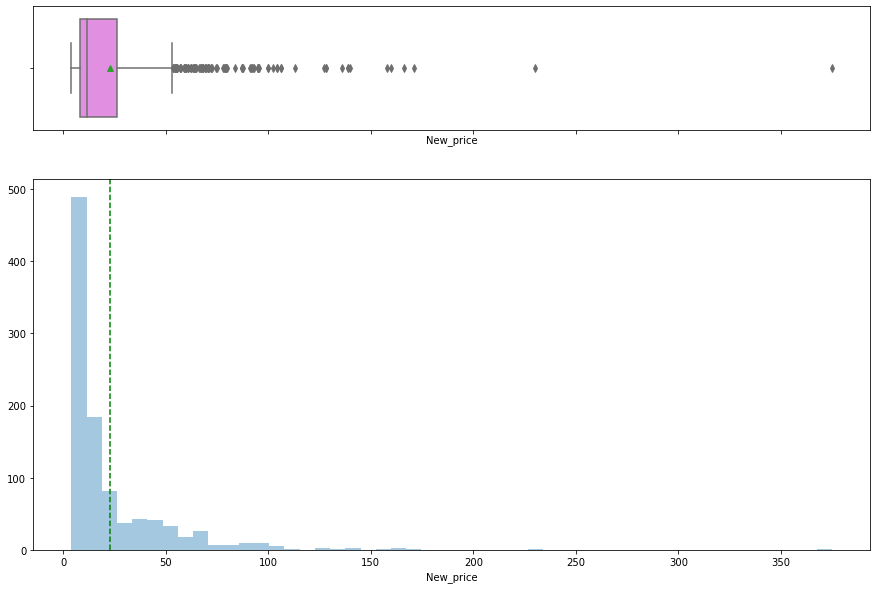

In [26]:
histogram_boxplot(data["New_price"])

**Observations for all the plots:**
- Year seems to be left-skewed.
- Mileage is rather normally-distributed, peaking at around 18.
- Engine is right-skewed, along with Power.
- Data for seats peaks around 5, with little data for the other number of seats.
- New_price is heavily left-skewed. The data matches closely with Price, which makes sense.

### **2. Categorical Data**

In [27]:
# function given by Great Learning

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

Explore different features with bar plots

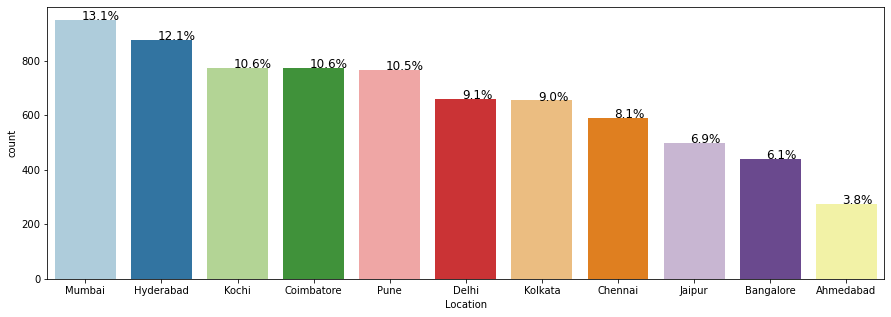

In [28]:
# Bar Plot for 'Location'
perc_on_bar('Location')

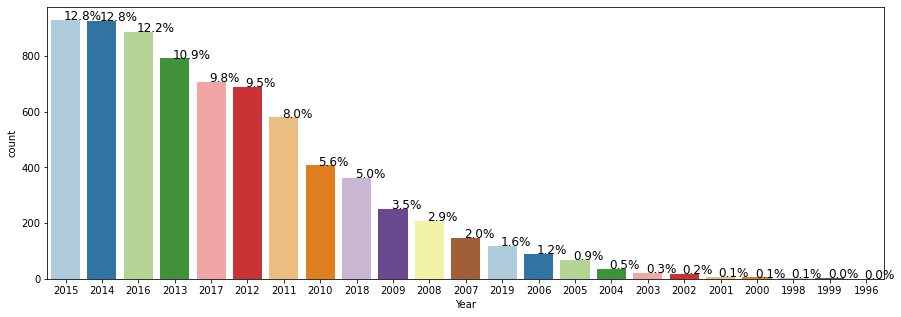

In [29]:
perc_on_bar('Year')

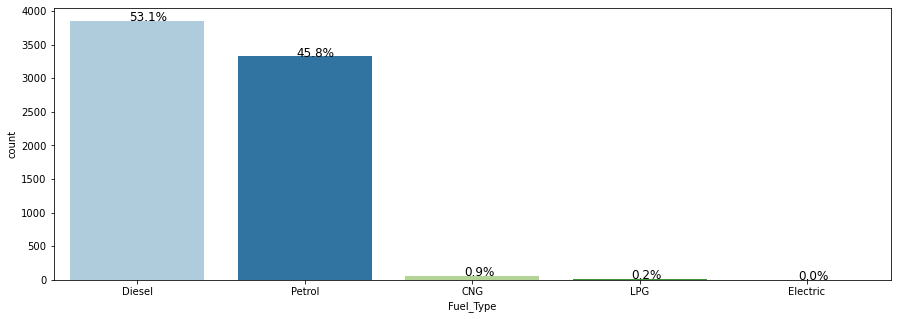

In [30]:
perc_on_bar('Fuel_Type')

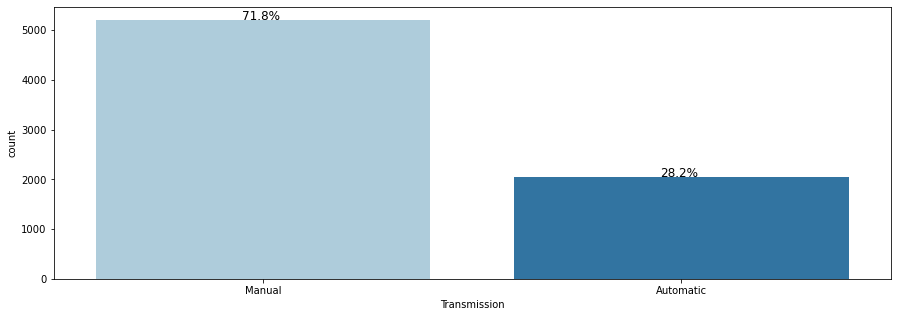

In [31]:
perc_on_bar('Transmission')

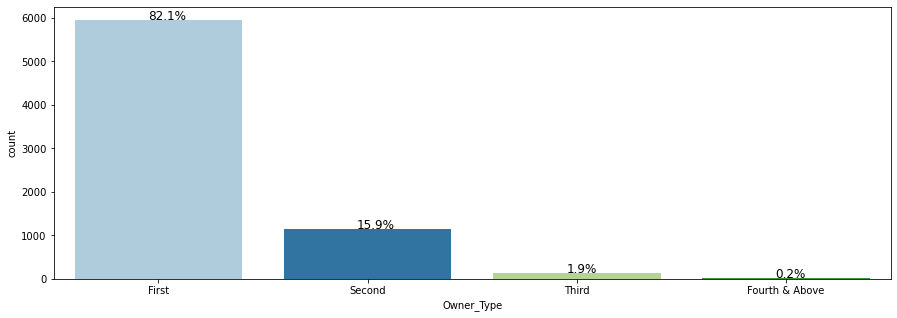

In [32]:
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**
- The most common place where cars are being sold is Mumbai.
- Overall, newer cars seem to be more common than older cars, with count dropping the older the car. Some exceptions include 2019 and 2018, though that could be attributed to the car being so new there's not as much data for it.
- The most common fuel type is Diesel, followed closely by Petrol. Other fuel types are rarely as common.
- The most common type of transmission is manual, over half of the data.
- Most cars have only had one owner, with barely any over four owners.

## **Bivariate Analysis**

### **1. Scatter plot**
Here, we explore the relationship between pairs of different variables

<AxesSubplot:xlabel='price_log'>

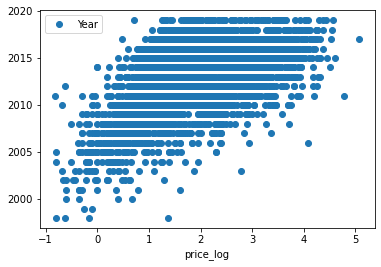

In [33]:
data.plot(x = 'price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='price_log'>

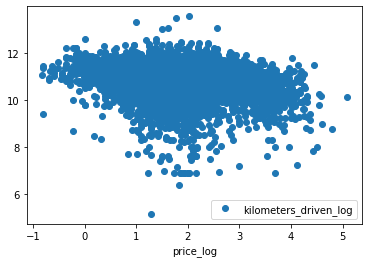

In [34]:
data.plot(x = 'price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='price_log'>

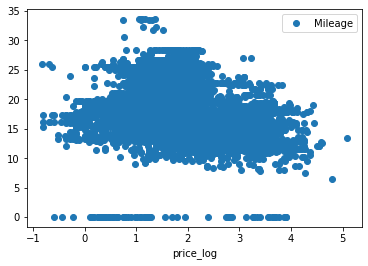

In [35]:
data.plot(x = 'price_log', y = 'Mileage', style = 'o')

<AxesSubplot:xlabel='price_log'>

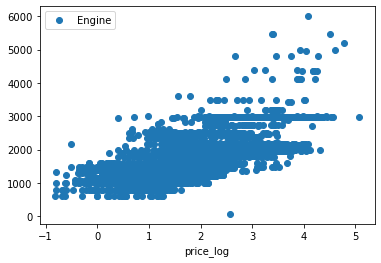

In [36]:
data.plot(x = 'price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='price_log'>

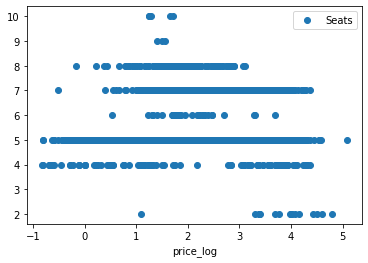

In [37]:
data.plot(x = 'price_log', y = 'Seats', style = 'o')

<AxesSubplot:xlabel='price_log'>

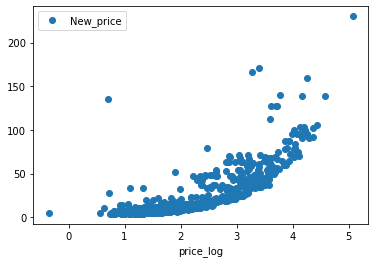

In [38]:
data.plot(x = 'price_log', y = 'New_price', style = 'o')

**Observations and Insights from all plots:**
- Price_log increases the newer the car is. This is intuitive, as cars made more recently would be worth more.
- There is no clear correlation between price_log and kilometers_driven_log or price_log and mileage.
- The more powerful the engine, the more the car is worth.
- Price_log and seats have no correlation. This makes sense, as the number of seats depends on the indidvidual buyer and what they use the car for.
- The more the car was worth when it was new, the more the car is worth used.

### **2. Heat map**

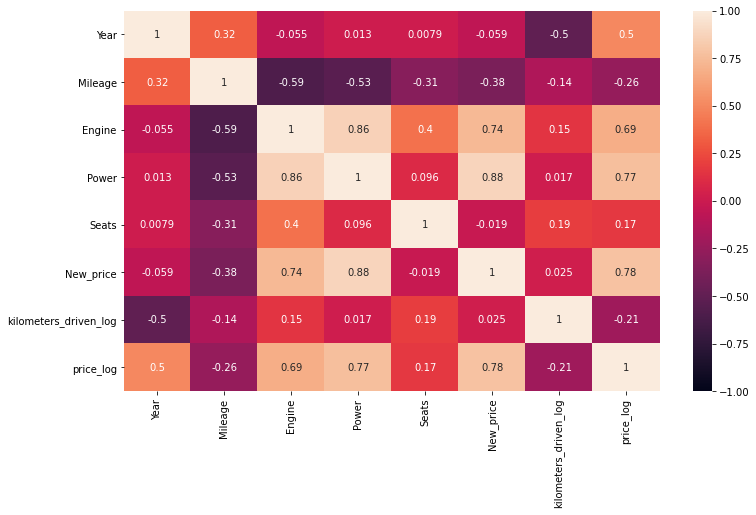

In [39]:
# Plot the correlation between all features
# We use the log transformation of 'Price' and 'Kilometers_Driven' instead of their original values
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Price', 'Kilometers_Driven'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**
- Engine and Power have an extremely high correlation. This makes sense; a better engine leads to higher power output.
- Power also has a high correlation with price_log and New_price. The more power the car, the more it is worth, even used.
- We see a similar correlation between Engine and price_log and New_price. The better the engine, the more expensive the car.
- Mileage has a negative correlation with Power and Engine. The lower the power of the engine, the less mileage a car has.

### **3. Box plot**

In [40]:
# function given by Great Learning
# This function takes the categorical column as the input and returns the boxplots for the variable with respect to Price.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

Perform bivariate analysis with categorical values

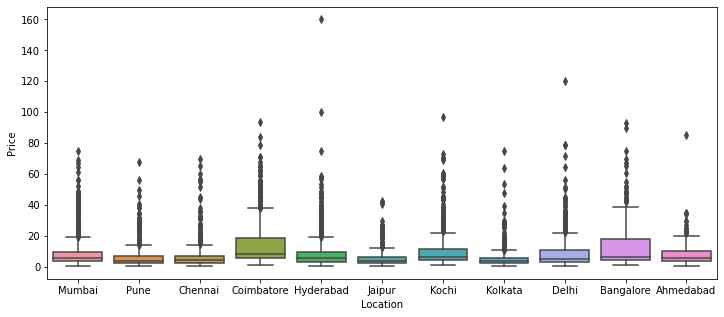

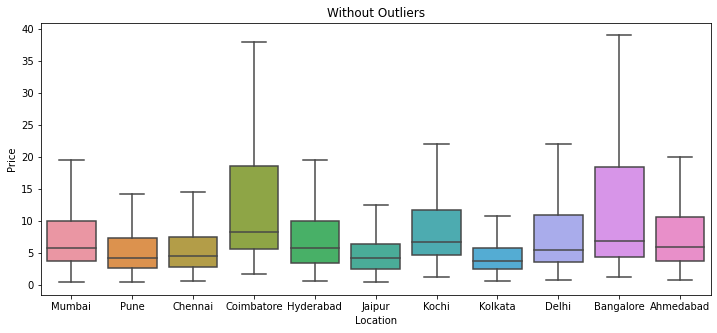

In [41]:
boxplot(data['Location'])

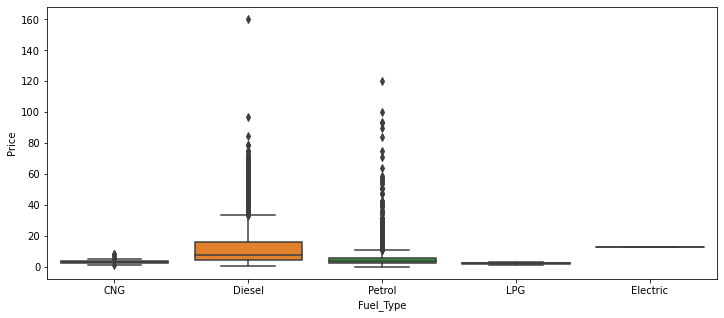

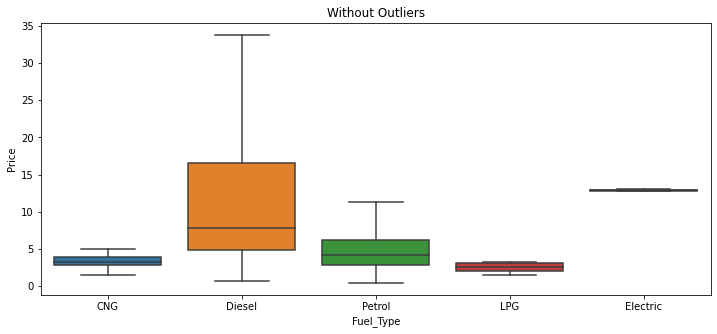

In [42]:
boxplot(data['Fuel_Type'])

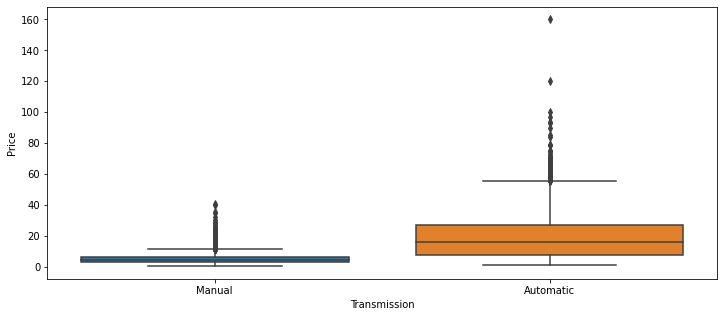

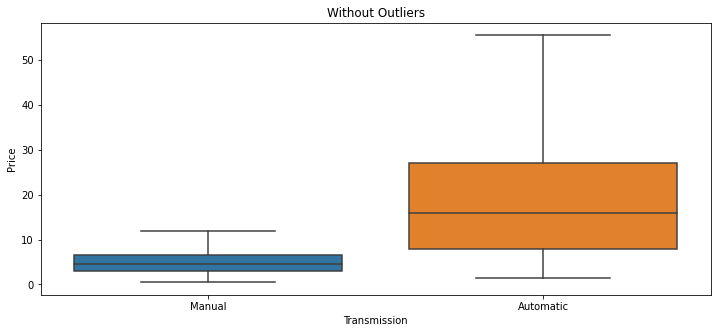

In [43]:
boxplot(data['Transmission'])

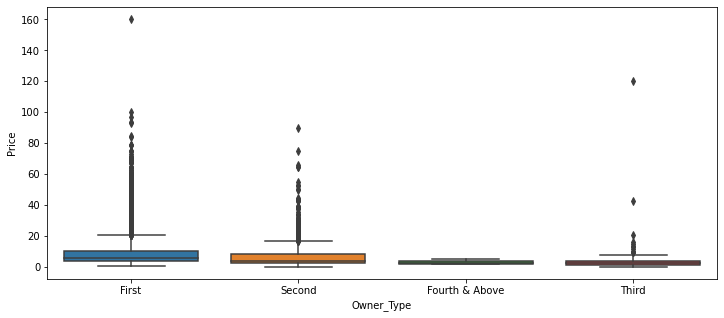

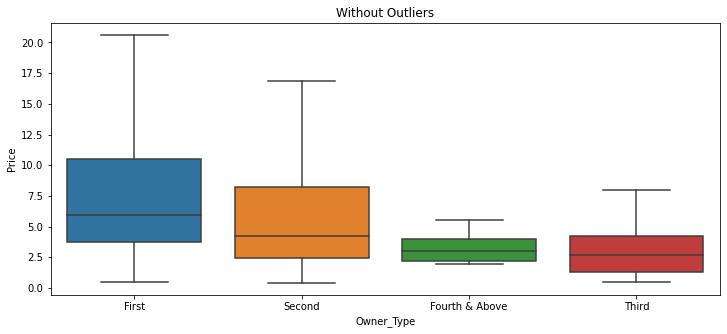

In [44]:
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:**
- For Location, Coimbatore and Bangalore seem to be the places with the most variation in price.
- For Fuel_Type, Diesel has the most variation.
- Automatic transmission cars tend to have a higher price than manual, but variation is greater as well.
- Many higher-priced cars have only had one to two owners.

### **Feature Engineering**

**Note:** The `Name` variable currently contains a lot of information, such as the brand and model of the car. There are 2041 unique values, which doesn't make it a very good predictor. Let's extract some information out of `Name` that may be more useful in our analysis.

In [45]:
# Function to help us find the brand of the car. For list of names l, extract the first word.
def extract_first_word(l):
    for name in l:
        return name.split()[0]
    
data['Brand'] = data.apply(lambda n: extract_first_word(n), axis=1)

In [46]:
data[['Name','Brand']].head()

,Name,Brand
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi


In [47]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

- There are two Isuzus, which we will condense into one.
- Land Rover has also been shortened to Land, which we will fix.

In [48]:
data['Brand'] = data['Brand'].apply(lambda x: 'Isuzu' if x == 'ISUZU' else x)

data['Brand'] = data['Brand'].apply(lambda x: 'Land Rover' if x == 'Land' else x)

In [49]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [50]:
data['Brand'].nunique()

32

#### **Observations and Insights:**
- From the name column, it seems that the car brand is listed first. We can use this to our advantage and extract the car brand from the car name and place the values into a separate column.
- The data was relatively clean, so there was minimal cleaning required.
- The data is much more usable now, going from 2041 unique values to 32.

### **Missing value treatment**

In [51]:
data.isnull()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7249,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7250,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
7251,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False


In [52]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
dtype: int64

#### **Observations and Insights:**
- The column with the most missing values is New_price.
- Price is also missing some values.
- Mileage, Engine, Power, and Seats are missing a few values.
- Every other column is filled completely.

**Missing values in Seats**

In [53]:
data['Seats'].isnull().sum()

53

We can use the information extracted from the `Name` column to help input missing values

In [54]:
# Iterate through all car brands and fill in null values of those car brands with the median number of seats for the brand
for b in data['Brand'].unique():
    seats_indices = data[data['Seats'].isnull()].query(" Brand == @b ").index
    data.loc[seats_indices, 'Seats'] = data.loc[data['Brand'] == b]['Seats'].median()

In [55]:
data['Seats'].isnull().sum()

0

**Missing values for Mileage**

In [56]:
data['Mileage'].isnull().sum()

2

In [57]:
# Use median to fill in missing values
for b in data['Brand'].unique():
    mileage_indices = data[data['Mileage'].isnull()].query(" Brand == @b ").index
    data.loc[mileage_indices, 'Mileage'] = data.loc[data['Brand'] == b]['Mileage'].median()

In [58]:
data['Mileage'].isnull().sum()

0

**Missing values for Engine**

In [59]:
data['Engine'].isnull().sum()

46

In [60]:
for b in data['Brand'].unique():
    engine_indices = data[data['Engine'].isnull()].query(" Brand == @b ").index
    data.loc[engine_indices, 'Engine'] = data.loc[data['Brand'] == b]['Engine'].median()

In [61]:
data['Engine'].isnull().sum()

0

**Missing values for Power**

In [62]:
data['Power'].isnull().sum()

175

In [63]:
for b in data['Brand'].unique():
    power_indices = data[data['Power'].isnull()].query(" Brand == @b ").index
    data.loc[power_indices, 'Power'] = data.loc[data['Brand'] == b]['Power'].median()

**Missing values for New_price**

In [64]:
data['New_price'].isnull().sum()

6246

In [65]:
for b in data['Brand'].unique():
    newprice_indices = data[data['New_price'].isnull()].query(" Brand == @b ").index
    data.loc[newprice_indices, 'New_price'] = data.loc[data['Brand'] == b]['New_price'].median()

In [66]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       2
Seats                       0
New_price                 159
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
dtype: int64

In [67]:
data.loc[data['New_price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand
145,Chevrolet Beat LT Option,Pune,2014,38800,Petrol,Manual,First,18.60,1199.0,76.80,5.0,NaN,2.85,10.566176,1.047319,Chevrolet
179,Chevrolet Beat Diesel LT,Jaipur,2012,88000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,1.50,11.385092,0.405465,Chevrolet
183,Chevrolet Optra Magnum 1.6 LS BS3,Jaipur,2007,118500,Petrol,Manual,First,12.90,1598.0,102.50,5.0,NaN,1.25,11.682668,0.223144,Chevrolet
231,Chevrolet Beat LT,Kochi,2016,60813,Petrol,Manual,Second,18.60,1199.0,76.80,5.0,NaN,3.32,11.015559,1.199965,Chevrolet
240,Chevrolet Beat Diesel LT,Mumbai,2013,74000,Diesel,Manual,First,25.44,936.0,57.60,5.0,NaN,2.65,11.211820,0.974560,Chevrolet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7111,Chevrolet Enjoy Petrol LTZ 7 Seater,Mumbai,2013,39000,Petrol,Manual,First,13.70,1399.0,98.82,7.0,NaN,NaN,10.571317,NaN,Chevrolet
7136,Chevrolet Spark 1.0 PS,Jaipur,2010,6512,Petrol,Manual,First,16.00,995.0,63.00,5.0,NaN,NaN,8.781402,NaN,Chevrolet
7141,Chevrolet Enjoy 1.4 LTZ 8,Pune,2016,67000,Petrol,Manual,First,13.70,1399.0,98.79,8.0,NaN,NaN,11.112448,NaN,Chevrolet
7223,Chevrolet Captiva LT,Kochi,2011,99120,Diesel,Manual,First,11.50,1991.0,147.90,7.0,NaN,NaN,11.504087,NaN,Chevrolet


In [68]:
data['New_price'].fillna(data['New_price'].median(), inplace=True)

In [69]:
data.loc[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.105,3.0,11.542484,1.098612,Smart
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,11.105,NaN,11.082143,NaN,Hindustan


In [70]:
data.loc[data['Brand'] == 'Smart']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.105,3.0,11.542484,1.098612,Smart


In [71]:
data.loc[data['Brand'] == 'Hindustan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,11.105,NaN,11.082143,NaN,Hindustan


**Observations for missing values after imputing:**
- Missing values for most attributes were able to be filled in with medians of previous data.
- The only missing value that could not be completely filled in with previous data is New_price and Power.
- For New_price, specifically Chevrolet brand cars have no filled values. It is likely then that none of the Chevrolet cars in the dataset have New_price data. They have been filled in with the median of New_price.
- For Power, there are only two values that have not been filled, and it is because there is only one car for each brand in the dataset, so there are no previous values to go off of.
- It is probably fine if we drop those two rows, as they might not be all that useful.

In [72]:
data.drop(915, inplace = True)
data.drop(6216, inplace = True)

In [73]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
dtype: int64

## **Proposed approach**

**Potential techniques -**
- We will use different approaches to build our model and see which model performs the best.
- An approach could be using linear regression, and implementing ways to prevent overfitting, such as lassoing.
- We could also use decision trees/random forests to see if that could be a potential solution as well.

**Overall solution design -**
- Our goal is to create a model that can predict the price of used cars.
- To do so, we can construct models based on the techniques above and determine which model is the best performing.
- We will do this by splitting the data that we haved cleaned into test and train data, building the model based on the train data and testing the created model on the test data to see how well it performs.

**Measures of success -**
- In creating a model, we must ensure that the model performs well on both the train and test data. It must not overfit on the training data and thus perform poorly on test data.
- The model must take into account the various features of the car in order to make its prediction, adding more weight to more important features.

### **Saving the Data**

In [74]:
df_cleaned = data.copy()

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [75]:
cars_data = df_cleaned

### **Dropping Null Values**

In [76]:
cars_data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
dtype: int64

In [77]:
cars_data.dropna(inplace = True)

In [78]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
dtype: int64

### **Split the Data**

1. First we will separate the features (X) from the output variable (y)
2. Then we will encode the categorical variables in X
3. Finally we will split the data into train and test sets

In [79]:
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["price_log", "Price"]]

In [80]:
X = pd.get_dummies(X, drop_first = True)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4211, 53) (1806, 53)


In [82]:
# Adapted from MIT and Great Learning
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable
import sklearn.metrics as metrics

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

The models we will train our data on are:<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear regression model**

In [83]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train['price_log'])

LR_score = get_model_score(lr)

R-sqaure on training set :  0.8533233029462108
R-square on test set :  0.8777300429946745
RMSE on training set :  4.301867152502498
RMSE on test set :  3.848729881957821


**Observations from results:**
- R-squared score on both training and test set are pretty good, with the model performing similarly well on both.
- Root-mean-squared error is also relatively close for both sets.
- Curiously, the model seems to do better on the test set.

In [85]:
# Import Statsmodels 
import statsmodels.api as sm

# Add constant to train data
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     994.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:58:01   Log-Likelihood:                 72.745
No. Observations:                4211   AIC:                            -37.49
Df Residuals:                    4157   BIC:                             305.2
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [86]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [87]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Brand_Chevrolet,-0.476051,4.995033e-02
Location_Mumbai,-0.043084,4.751270e-02
Brand_Fiat,-0.504980,4.209457e-02
Brand_Bentley,-0.958115,2.888168e-02
Location_Delhi,-0.054294,1.678818e-02
Brand_Datsun,-0.649514,1.046978e-02
Brand_Tata,-0.668316,5.858901e-03
Location_Jaipur,-0.068133,4.059150e-03
Brand_Mini,0.782652,1.637906e-03
New_price,0.002508,1.488049e-03


In [88]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Brand', 'Location', 'New_price', 'Fuel_Type', 'Owner_Type', 'Seats', 'Mileage', 'Engine', 'kilometers_driven_log', 'Transmission', 'Power', 'Year']


### **Ridge Regression**

In [89]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train['price_log'])

ridge_score = get_model_score(ridge)

R-sqaure on training set :  0.8504003652640479
R-square on test set :  0.8780879991604287
RMSE on training set :  4.344518994976142
RMSE on test set :  3.843092003194803


**Observations from results:**
- The ridge regression model performs similarly to linear regression, with extremely similar performances on training and testing sets.
- Like linear regression, the test set performs slightly better, although the differences between training and testing performances are small.

### **Decision Tree** 

In [90]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 1)
dtree.fit(X_train, y_train["price_log"])

get_model_score(dtree)

R-sqaure on training set :  0.9999987364510128
R-square on test set :  0.8650495196746861
RMSE on training set :  0.012626194519501388
RMSE on test set :  4.043381962405975


[0.9999987364510128,
 0.8650495196746861,
 0.012626194519501388,
 4.043381962405975]

**Observations from results:**
- Model performs extremely well on training set, with an r-squared of almost 1 and RMSE of almost 0.
- However, it doesn't perform as well on the test set, indicating the model might be overfitting on the training data.
- Score on test set is similar to that of linear and ridge regression.

Let's look at the Gini importance of each feature in the tree

In [91]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["dtree_Imp"], index = X_train.columns).sort_values(by = 'dtree_Imp', ascending = False))

                           dtree_Imp
Power                       0.593315
Year                        0.236308
New_price                   0.075947
Engine                      0.021076
kilometers_driven_log       0.014565
Mileage                     0.010532
Seats                       0.005761
Brand_Tata                  0.004991
Location_Kolkata            0.004512
Brand_Toyota                0.004406
Fuel_Type_Petrol            0.003890
Location_Hyderabad          0.002912
Owner_Type_Second           0.001653
Location_Coimbatore         0.001648
Transmission_Manual         0.001639
Location_Bangalore          0.001592
Location_Pune               0.001583
Location_Kochi              0.001510
Fuel_Type_Diesel            0.001503
Location_Delhi              0.001471
Location_Mumbai             0.001457
Location_Chennai            0.001170
Location_Jaipur             0.000967
Brand_Maruti                0.000955
Brand_Land Rover            0.000845
Brand_Hyundai               0.000587
B

**Observations and insights:**
- From the tree model, the most important feature seems to be power, followed by year, new_price, and engine.
- Brand of the car, especially for certain cars such as Lamborghini or Jeep, are not as important.

### **Random Forest**

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train['price_log'])

get_model_score(rf)

R-sqaure on training set :  0.9660938248729404
R-square on test set :  0.9000917494436175
RMSE on training set :  2.0683109644107787
RMSE on test set :  3.47903044433746


[0.9660938248729404, 0.9000917494436175, 2.0683109644107787, 3.47903044433746]

**Observations and insights:**
- Random forests perform very well on the training set, but like the decision tree model, not as well on the test set, indicating overfitting.
- However, random forests do perform better than decision trees on the test set, with a higher r-squared and lower RMSE.

In [93]:
# Print important features similar to decision trees
print(pd.DataFrame(rf.feature_importances_, columns = ["RF_Imp"], index = X_train.columns).sort_values(by = 'RF_Imp', ascending = False))

                                 RF_Imp
Power                      4.417833e-01
Year                       2.323396e-01
New_price                  2.286603e-01
Engine                     2.796549e-02
kilometers_driven_log      1.444715e-02
Mileage                    1.309927e-02
Location_Kolkata           4.462448e-03
Brand_Tata                 4.447776e-03
Seats                      3.606331e-03
Location_Hyderabad         3.155480e-03
Location_Coimbatore        1.957183e-03
Brand_Toyota               1.794996e-03
Owner_Type_Second          1.650945e-03
Location_Bangalore         1.574596e-03
Transmission_Manual        1.430632e-03
Location_Mumbai            1.394320e-03
Location_Kochi             1.327841e-03
Location_Pune              1.320686e-03
Location_Delhi             1.243395e-03
Location_Jaipur            1.197200e-03
Fuel_Type_Diesel           1.127814e-03
Location_Chennai           1.030706e-03
Brand_Porsche              9.530995e-04
Fuel_Type_Petrol           9.475659e-04


**Observations and insights:**
- Similar to decision trees, random forests prioritize power, followed by year and new_price.
- Brands are not prioritized as much, indicating less importance.
- Overall, the ranking of feature importance is very similar to the decision tree model.

### **Hyperparameter Tuning: Decision Tree**

In [94]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {"max_depth": np.arange(5, 10),
              "max_leaf_nodes": np.arange(30, 35),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, param_grid = parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train["price_log"])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train["price_log"])

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=30, random_state=1)

In [95]:
get_model_score(dtree_tuned)

R-sqaure on training set :  0.8361897700874239
R-square on test set :  0.8428621635491143
RMSE on training set :  4.546183315026243
RMSE on test set :  4.3631278262573625


[0.8361897700874239, 0.8428621635491143, 4.546183315026243, 4.3631278262573625]

**Observations and insights:**
- Overfitting has been drastically reduced on the training set.
- The model now performs similarly on both training and test sets.

**Feature Importance**

In [96]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["dtree_tuned_Imp"], index = X_train.columns).sort_values(by = 'dtree_tuned_Imp', ascending = False))

                           dtree_tuned_Imp
Power                             0.663144
Year                              0.250657
New_price                         0.075267
Engine                            0.005499
Brand_Tata                        0.003396
Brand_Toyota                      0.002037
Brand_Land Rover                  0.000000
Brand_Fiat                        0.000000
Brand_Force                       0.000000
Brand_Ford                        0.000000
Brand_Honda                       0.000000
Brand_Hyundai                     0.000000
Brand_Isuzu                       0.000000
Brand_Jaguar                      0.000000
Brand_Jeep                        0.000000
Brand_Lamborghini                 0.000000
Brand_Mercedes-Benz               0.000000
Brand_Mahindra                    0.000000
Brand_Maruti                      0.000000
Brand_Chevrolet                   0.000000
Brand_Mini                        0.000000
Brand_Mitsubishi                  0.000000
Brand_Nissa

**Observations and insights:**
- Feature importance is very similar to that of an untuned decision tree in terms of the top features.
- However, the tuning has seemed to brought out the most important features in determining car price.
- Most of the importances are 0, but features that have a noticeable importance score are Power, Year, New_price, and Engine.

### **Hyperparameter Tuning: Random Forest**

In [97]:
# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state = 1)

# Define the parameters for Grid to choose from

# Check documentation for all the parametrs that the model takes and play with those
parameters = {"n_estimators": [80, 90, 110],
              "max_depth": [25, 50, 75],
              "max_features": [0.4, 0.5, 0.6]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train["price_log"])

# Set the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_depth=25, max_features=0.4, n_estimators=80,
                      random_state=1)

In [98]:
get_model_score(rf_tuned)

R-sqaure on training set :  0.9685881162406991
R-square on test set :  0.907548878804843
RMSE on training set :  1.9907807132261952
RMSE on test set :  3.3466757993885854


[0.9685881162406991, 0.907548878804843, 1.9907807132261952, 3.3466757993885854]

**Observations and insights:**
- Test set performance has improved, and RMSE has decreased as well.
- Overal performance on both train and test set has improved, with a higher r-squared and lower RMSE.

**Feature Importance**

In [99]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["rf_tuned_Imp"], index = X_train.columns).sort_values(by = 'rf_tuned_Imp', ascending = False))

                           rf_tuned_Imp
Power                          0.287055
New_price                      0.217108
Year                           0.191662
Engine                         0.095689
Transmission_Manual            0.071709
kilometers_driven_log          0.027147
Mileage                        0.024704
Fuel_Type_Diesel               0.020095
Seats                          0.011436
Location_Kolkata               0.004896
Fuel_Type_Petrol               0.004730
Brand_Mercedes-Benz            0.003897
Brand_Tata                     0.003702
Owner_Type_Second              0.003329
Location_Hyderabad             0.003084
Location_Coimbatore            0.003026
Brand_Toyota                   0.001915
Owner_Type_Third               0.001771
Location_Jaipur                0.001766
Location_Mumbai                0.001675
Location_Pune                  0.001505
Brand_Honda                    0.001496
Location_Kochi                 0.001473
Location_Bangalore             0.001468


**Observations and insights:**
- Similar to the untuned random forest model, power, year, new_price, and engine are the most important features in determining the estimated price of a used car.
- Some other features, such as manual transmission, kilometers driven, and mileage are more emphasized in this model.
- Unlike the tuned decision tree model, random forests take into account more features, albeit with varying importances.

In [100]:
# Defining list of models we have trained
models = [lr, dtree_tuned, ridge, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [101]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge Regression', 'Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.853323,0.877730,4.301867,3.848730
1,Decision Tree,0.836190,0.842862,4.546183,4.363128
2,Ridge Regression,0.850400,0.878088,4.344519,3.843092
3,Random Forest,0.968588,0.907549,1.990781,3.346676


**Observations:**
- The tuned Random Forest model seems to perform the best overall on the data, with a high r-squared and low RMSE on both train and test sets.
- The Random Forest model performs better on training than test, implying that the model is overfitting on training data.
- The tuned Decision Tree model performs the most consistently between train and test, with little overfitting.

### **Insights**

**Refined insights**:
- The most important features that contribute to the price of a used car, as supported by all the models tested so far, are:
    - The power of the car
    - The price of the car when it's bought new
    - The year the car was manufactured
    - The performance of the car's engine
- A car with more power is likely to be more expensive.
- The higher the price of the car when it was bought new, the higher the price of the car bought used.
- The better the car performs, the more it will be valued.

**Comparison of various techniques and their relative performance**:
- Linear and Ridge regression perform similarly, with similar r-squared scores and RMSE.
- Decision tree performs the poorest out of the models that were tested, but has the least variation between training and testing scores.
- Random Forest performs the best out of the tested models, with a high r-squared score and low RMSE. However, it also has the greatest variation between training and testing scores.
- There is room to improve upon the Random Forest model, by pruning the trees to prevent overfitting.

**Proposal for the final solution design**:
- Random Forest would be the best solution in this scenario.
- It performs the best out of the tested models by a noticeable margin, and takes into account many features to make its predictions.
- Its only drawback--the overfitting--can be mitigated by developing and improving the model further.

References:
- https://www.nydailynews.com/autos/street-smarts/buying-car-smart-article-1.2542710
- Great Learning / MIT Applied Data Science Program